In [3]:
import pandas as pd
import zipfile
import requests
import os

# Download the dataset
url = "https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip"
response = requests.get(url)

# Save the zip file
zip_file_path = "wholesale_customers.zip"
with open(zip_file_path, "wb") as f:
    f.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the dataset into a DataFrame
data = pd.read_csv("Wholesale customers data.csv")

# Drop the Region column
data = data.drop(columns=["Region"])
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [4]:
# Filter the data for clients that are restaurants, hotels, and caf�s (Foodservice)
filtered_data = data[data["Channel"] == 2].drop(columns=["Channel"])
filtered_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451


In [5]:
# Normalize the data by computing the proportionate spending per product category
normalized_data = filtered_data.div(filtered_data.sum(axis=1), axis=0)
normalized_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
4,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
5,0.352415,0.309210,0.191913,0.024934,0.067203,0.054324


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(normalized_data)
standardized_data_df = pd.DataFrame(standardized_data, columns=normalized_data.columns)
standardized_data_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535
1,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256
2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002
3,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483
4,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884


In [7]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\LucaH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(normalized_data)
standardized_data_df = pd.DataFrame(standardized_data, columns=normalized_data.columns)
standardized_data_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535
1,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256
2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002
3,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483
4,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884


In [9]:
from sklearn.cluster import KMeans

# Use K-means to cluster the customers into K = 4 groups
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(standardized_data)

# Add the cluster labels to the standardized data
standardized_data_df['Cluster'] = kmeans.labels_
standardized_data_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.979769,0.701156,-1.109689,-0.696614,-1.049178,-0.008535,2
1,0.074523,0.835727,-0.528845,0.268920,-0.756990,0.394256,0
2,-0.144927,0.217881,-1.213271,0.532057,-0.798839,4.969002,2
3,1.657158,-1.184202,-1.686523,0.929731,-1.614262,2.074483,2
4,0.871886,0.998584,-1.371536,-0.310739,-1.207823,0.420884,2


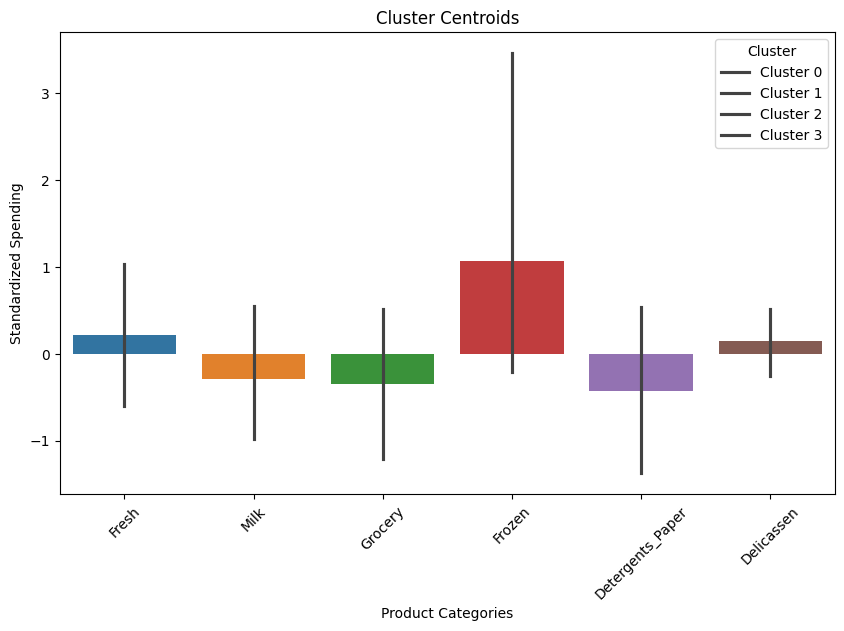

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame for centroids
centroids_df = pd.DataFrame(centroids, columns=normalized_data.columns)

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.barplot(data=centroids_df)
plt.title('Cluster Centroids')
plt.xlabel('Product Categories')
plt.ylabel('Standardized Spending')
plt.xticks(rotation=45)
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(centroids_df.shape[0])])
plt.show()

In [11]:
# Create descriptions based on the cluster centroids
descriptions = {}

for i in range(centroids_df.shape[0]):
    descriptions[f'Cluster {i}'] = centroids_df.iloc[i].to_dict()

descriptions

{'Cluster 0': {'Fresh': -0.5390558146930706,
  'Milk': 0.9261244068533759,
  'Grocery': 0.13960731374804056,
  'Frozen': -0.11983251334839591,
  'Detergents_Paper': -0.025414053725450927,
  'Delicassen': 0.14681843026904187},
 'Cluster 1': {'Fresh': -0.6720954548399768,
  'Milk': -0.2967630442733292,
  'Grocery': 0.8975383361200845,
  'Frozen': -0.27327038622484195,
  'Detergents_Paper': 0.9930836157655388,
  'Delicassen': -0.41000835963786997},
 'Cluster 2': {'Fresh': 1.2122437114216056,
  'Milk': -0.5904772167353941,
  'Grocery': -0.9581314250872817,
  'Frozen': -0.006282047024422095,
  'Detergents_Paper': -0.8455724234608205,
  'Delicassen': 0.20978057574516293},
 'Cluster 3': {'Fresh': 0.8630866813389244,
  'Milk': -1.2054684890078855,
  'Grocery': -1.457532954397385,
  'Frozen': 4.649702119035072,
  'Detergents_Paper': -1.8141962785292634,
  'Delicassen': 0.6456886394102075}}